# Face Detection Challenge

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Objectives
-  visualize images
-  preprocess images for Neural Networks
-  fit a custom CNN for a regression task
-  fine-tune a analyse model performance

## 1. Visualize images

👉 Load the dataset (200 Mo)

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/images.csv")
data

,age,pixels
0,1,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...
23700,99,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,45 108 120 156 206 197 140 180 191 199 204 207...


Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

❓ Plot the histogram of age in your dataset

<AxesSubplot:xlabel='age', ylabel='Count'>

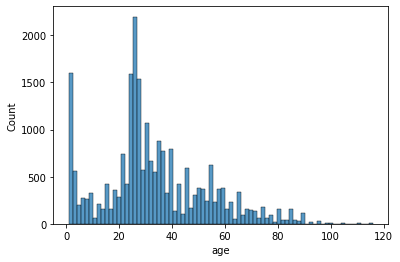

In [3]:
sns.histplot(data.age)

❓ Visually display one image of your choice.

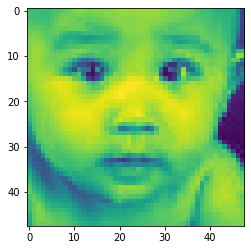

In [4]:
#np.fromstring(list(data.pixels[0]), dtype=int, sep='')
im_1 = np.fromstring(data.pixels[0],sep=' ').astype(int)
im_1 = im_1.reshape(48, 48)  
plt.imshow(im_1)

❓ What is the physical characteristic of the image at **index** `10000`?

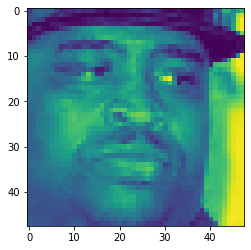

In [5]:
# Store your result in the variable below
im_10000 = np.fromstring(data.pixels[10000],sep=' ').astype(int)
im_10000 = im_10000.reshape(48, 48)  
plt.imshow(im_10000)

gender = "male"

smile = False

In [6]:
!pip install nbresult
from nbresult import ChallengeResult

result = ChallengeResult('C14',
                         gender=gender,
                         smile=smile)
result.write()

You should consider upgrading via the '/home/elan/.pyenv/versions/3.8.6/envs/backinthessr/bin/python3.8 -m pip install --upgrade pip' command.


## 2. Processing

❓ Your goal is to train a convolutional neural network model to predict the age of a person based solely on a picture of his/her face.
- Create your feature matrix `X` as nparray of shape suited for a CNN, scaled between 0 and 1
- Create your target vector `y`
- Create a holdout set (`X_train`, `y_train`) (`X_test`, `y_test`) keeping `30%` in the test set, randomly sampled out of the whole dataset

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [7]:
from sklearn.preprocessing import MinMaxScaler

def transform(image):
    np_image = np.fromstring(image, dtype=int, sep=' ').reshape(48, 48)
    scaler = MinMaxScaler()
    return scaler.fit_transform(np_image)
X = pd.Series(list(map(transform, data.pixels)))
y = pd.Series(data.age)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from nbresult import ChallengeResult
result = ChallengeResult('C1415', 
                         X_train_shape = X_train.shape,
                         y_train_shape = y_train.shape,
                         first_image = X_train[0]
                        )
result.write()

## Convolutional Neural Network for Age prediction

❓ Build a convolutional neural network

- Do not use transfer learning
- Store number of trainable parameters in a variable `params_number`
- Plot your metric & loss at each epoch
- make sure your model does not overfit with appropriate control techniques
- Compute the mean absolute error on your test set and store it as `mae_test`
- Compute, store and compare it with a `mae_baseline`

💡 You will not be judged by the computing power of your computer, but you should obtain significantly better performance than the baseline in less than 3 minutes, even without GPUs

👉 Feel free to start back from the solution by running the cell below (~500Mo download)

In [10]:
import pickle

file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
pickles = dict()

for file_name in file_names:
    url = f"https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/{file_name}"
    command = f"curl --output {file_name} {url}"
    ! eval {command}
    with open(file_name, 'rb') as handle:
        pickles[file_name] = pickle.load(handle)
    command = f"rm {file_name}"
    ! eval {command}
        
X_train, X_test, y_train, y_test = pickles.values()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  291M  100  291M    0     0  4549k      0  0:01:05  0:01:05 --:--:-- 3564k747k      0  0:00:51  0:00:08  0:00:43 6534k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125M  100  125M    0     0  4985k      0  0:00:25  0:00:25 --:--:-- 4291k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0   512k      0 --:--:-- --:--:-- --:--:--  514k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57023  100 57023    0     0   285k      0 --:--:-- --:--:-- --:--:--  284k


In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2D

model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_shape=(16593, 48, 48, 1)))
#model.add(Reshape((48*48*3,), input_shape=(48, 48)))
#model.add(layers.Conv2D(50, kernel_size=(3, 3), activation='relu', input_shape=(48, 48)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.compile(loss='mae', 
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
X_train.shape

(16593, 48, 48, 1)

In [13]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=30, restore_best_weights=True)

history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.3,
          callbacks=[es])

Epoch 1/100
726/726 [==============================] - 32s 42ms/step - loss: 23.2197 - accuracy: 0.0387 - val_loss: 15.3016 - val_accuracy: 0.0418
Epoch 2/100
726/726 [==============================] - 30s 41ms/step - loss: 15.0725 - accuracy: 0.0518 - val_loss: 15.0612 - val_accuracy: 0.0418
Epoch 3/100
726/726 [==============================] - 35s 48ms/step - loss: 14.8531 - accuracy: 0.0503 - val_loss: 15.0302 - val_accuracy: 0.0418
Epoch 4/100
726/726 [==============================] - 26s 36ms/step - loss: 15.0012 - accuracy: 0.0449 - val_loss: 15.0951 - val_accuracy: 0.0418
Epoch 5/100
726/726 [==============================] - 34s 48ms/step - loss: 14.8095 - accuracy: 0.0479 - val_loss: 15.0917 - val_accuracy: 0.0418
Epoch 6/100
726/726 [==============================] - 31s 43ms/step - loss: 15.0453 - accuracy: 0.0505 - val_loss: 15.0360 - val_accuracy: 0.0418
Epoch 7/100
726/726 [==============================] - 30s 41ms/step - loss: 14.9310 - accuracy: 0.0495 - val_loss: 15

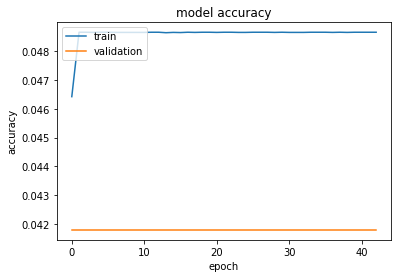

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#plt.plot(train_sizes, train_scores_mean, label = 'Training score')
#plt.plot(train_sizes, test_scores_mean, label = 'Test score')
#plt.ylabel('r2 score', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.legend()

/home/elan/.pyenv/versions/3.8.6/envs/backinthessr/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: only size-1 arrays can be converted to Python scalars

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/elan/.pyenv/versions/3.8.6/envs/backinthessr/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/elan/.pyenv/versions/3.8.6/envs/backinthessr/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "/home/elan/.pyenv/versions/3.8.6/envs/backinthessr/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_

In [52]:
X = X.tolist()

In [56]:
from sklearn.metrics import mean_absolute_error

mae_baseline = pd.Series(y_test).apply(lambda x : abs(data.age.mean() - x)).mean()
mae_test = model.evaluate(X_test, y_test, verbose=1)[1]

223/223 [==============================] - 12s 51ms/step - loss: 14.9841 - accuracy: 0.0493


In [33]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate

mae_baseline = DummyRegressor(strategy="median")
cv_results = cross_validate(mae_baseline,X_train, y_train)

cv_results['test_score'].mean()

-0.04481389446787376

In [34]:
params_number = model.count_params()

In [58]:
from nbresult import ChallengeResult
result = ChallengeResult('C1516',
                         params_number=params_number,
                         mae_baseline = mae_baseline,
                         mae_test = mae_test,
                        )
result.write()